# Logistic Regression

## Synthetic two feature binary classification dataset.

`synthetic_binary.csv` is a synthetic (not-real) dataset for a binary classification task. The dataset has two continuous features `feature 1` and `feature 2`, and a binary output label `output`. 

---
## Step 1: Read the dataset and pre-process the features

- read in 'synthetic_binary.csv'
- create X_data, y_data numpy arrays
- STRATIFY split X_data, y_data into 80-20% X_train, y_train, X_test, y_test using scitkit-learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- further STRATIFY split X_data, y_data into 80-20% X_train, y_train, X_test, y_test using scitkit-learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- Standard-Scale feature 1 and feature 2. Use scikit-learn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for this step.

Note: use random_state=20211008

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

data_df = pd.read_csv('./synthetic_binary.csv')

display(data_df.head())

,feature 1,feature 2,output
0,-1.36,6.69,0.0
1,-8.12,-10.64,1.0
2,8.03,-9.94,1.0
3,-3.39,5.50,0.0
4,9.99,5.57,1.0


In [2]:
feat_df = data_df[['feature 1', 'feature 2']]
output_df = data_df['output']

# create X_data, y_data
X_data = feat_df.values
y_data = output_df.values

# split into train-val-test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=20211008, stratify=y_data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=20211008, stratify=y_train)

print('X_data={}'.format(X_data.shape))
print('X_train={}, X_val={}, X_test={}'.format(X_train.shape, X_val.shape, X_test.shape))
print('y_train={}, y_val={}, y_test={}'.format(y_train.shape, y_val.shape, y_test.shape))
print()
print('class % in y_train = {}'.format((np.unique(y_train, return_counts=True)[1]/y_train.shape[0]).round(2)))
print('class % in y_val = {}'.format((np.unique(y_val, return_counts=True)[1]/y_val.shape[0]).round(2)))
print('class % in y_test = {}'.format((np.unique(y_test, return_counts=True)[1]/y_test.shape[0]).round(2)))

X_data=(550, 2)
X_train=(352, 2), X_val=(88, 2), X_test=(110, 2)
y_train=(352,), y_val=(88,), y_test=(110,)

class % in y_train = [0.45 0.55]
class % in y_val = [0.45 0.55]
class % in y_test = [0.45 0.55]


C:\Users\omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X_train Synthetic dataset for a binary classification two-feature task')

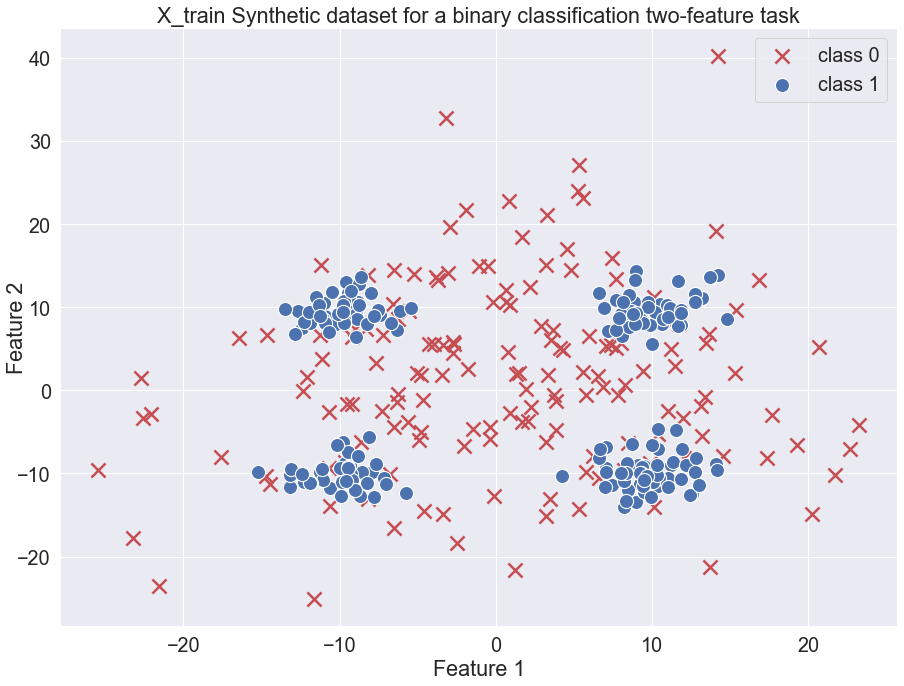

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set(font_scale=1.8)

plt.figure(figsize=(15,11))

X_train_1 = X_train[np.where(y_train==1)[0]]
X_train_0 = X_train[np.where(y_train==0)[0]]
sns.scatterplot(X_train_0[:,0], X_train_0[:,1], linewidth=2.5, marker='x', s=200, color='r', zorder=2, label='class 0')
sns.scatterplot(X_train_1[:,0], X_train_1[:,1], marker='o', s=200, color='b', zorder=2, label='class 1')

plt.ylabel('Feature 2', labelpad=-10)
plt.xlabel('Feature 1')
plt.title('X_train Synthetic dataset for a binary classification two-feature task')

---
## Step 2: Find best degree polynomial logistic regression using X_train, y_train and X_val, y_val

We will apply various degree polynomial transformations on the features and fit logistic regression on the trainign set. The validation set performance will be used to select which degree polynomial gave us the best fit.

- define the degrees you will sweep on. these are already defined for you `degrees_list = [1, 2, 3, 4, 5, 6, 8, 9, 10]`
- loop on the degree list and for each degree_val do:
    - use scikit-learn's [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to build polynomial features of X_train and X_val. 
    - Standard-Scale generated poly features. Use scikit-learn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for this step.
    - use scikit-learn's [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to fit on X_train_poly, y_train. 
    - Evaluate the fit LogReg model on X_val_poly, y_val using scikit-learn's [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - maintain the best_acc and best_degree as you sweep.
    
**Note: There are missing/incomplete lines which you need to complete**

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

degrees_list = [1, 2, 3, 4, 5, 6, 8, 9, 10]

best_degree = 1
best_acc = 0.0
for degree_val in degrees_list:
    # apply PolynomialFeatures to X_train and X_val
    poly = PolynomialFeatures(degree_val, include_bias=False) 

    X_train_poly = poly.fit_transform(X_train) 
    X_val_poly = poly.fit_transform(X_val)  

    # standard-scale the generated poly features using StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train_poly)

    X_train_poly = scaler.transform(X_train_poly)
    X_val_poly = scaler.transform(X_val_poly)

    # fit LogReg on X_train_poly, y_train
    clf = LogisticRegression(random_state=20211008, max_iter=1000)
    clf.fit(X_train_poly, y_train)
    
    # evaluate on X_train_poly, y_train and X_val_poly, y_val
    y_pred_on_train = clf.predict(X_train_poly)
    train_acc = sklearn.metrics.accuracy_score(y_true=y_train, y_pred=y_pred_on_train)
    
    y_pred_on_val = clf.predict(X_val_poly)
    val_acc = sklearn.metrics.accuracy_score(y_true=y_val, y_pred=y_pred_on_val)
    
    print("Setting degree={}, train_acc={:.2f}, val_acc={:.2f}".format(degree_val, train_acc, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        best_degree = degree_val
        
print("Best setting degree={}, val_acc={:.2f}".format(best_degree, best_acc))

Setting degree=1, train_acc=0.58, val_acc=0.56
Setting degree=2, train_acc=0.53, val_acc=0.51
Setting degree=3, train_acc=0.65, val_acc=0.64
Setting degree=4, train_acc=0.83, val_acc=0.80
Setting degree=5, train_acc=0.83, val_acc=0.81
Setting degree=6, train_acc=0.82, val_acc=0.81
Setting degree=8, train_acc=0.83, val_acc=0.81
Setting degree=9, train_acc=0.83, val_acc=0.81
Setting degree=10, train_acc=0.83, val_acc=0.81
Best setting degree=5, val_acc=0.81


In [14]:
best_degree = 5
# evaluate best degree on X_test, y_test

# merge train and val data
X_train_val_merge = np.vstack([X_train, X_val]) 
y_train_val_merge = np.hstack([y_train, y_val]) 
    
# apply PolynomialFeatures with best_degree
poly = PolynomialFeatures(best_degree, include_bias=False) 

X_train_poly = poly.fit_transform(X_train_val_merge) 
X_test_poly = poly.fit_transform(X_test)

# standard-scale the generated poly features using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_poly)

X_train_poly = scaler.transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# fit LogReg on X_train_poly, y_train
clf = LogisticRegression(random_state=20211008, max_iter=1000)
clf.fit(X_train_poly, y_train_val_merge)

# predict on X_test_poly, y_test
y_pred_on_test = clf.predict(X_test_poly)
test_acc = sklearn.metrics.accuracy_score(y_true=y_test, y_pred=y_pred_on_test)

print("Best setting degree={}, test_acc={:.2f}".format(best_degree, test_acc))

Best setting degree=5, test_acc=0.85


(62500,)


C:\Users\omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


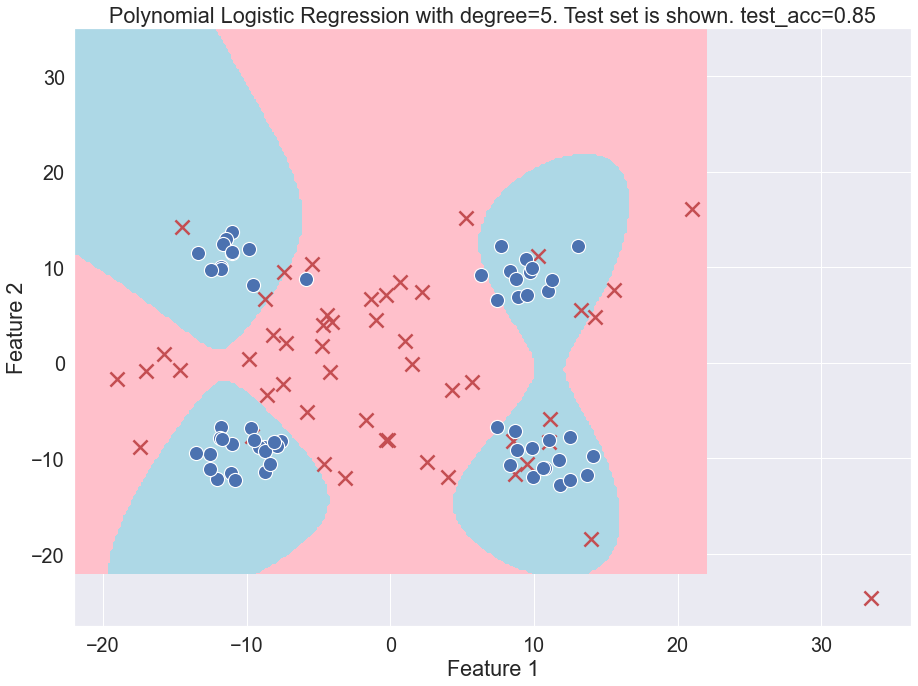

In [22]:
from matplotlib.colors import ListedColormap

lims = 22
x_pts = np.linspace(-lims, lims, 250)
y_pts = np.linspace(-lims, 35, 250)

xx, yy = np.meshgrid(x_pts, y_pts)
pts_init = np.c_[xx.ravel(), yy.ravel()]
poly = PolynomialFeatures(best_degree, include_bias=False)
pts_poly = poly.fit_transform(pts_init)
scaler = StandardScaler()
pts_poly = scaler.fit(poly.fit_transform(X_train_val_merge)).transform(pts_poly)

Z = clf.predict(pts_poly)
print(Z.shape)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15,11));
X_test1 = X_test[np.where(y_test==1)[0]]
X_test0 = X_test[np.where(y_test==0)[0]]

sns.scatterplot(X_test0[:,0], X_test0[:,1], linewidth=2.5, marker='x', s=200, color='r', zorder=2)
sns.scatterplot(X_test1[:,0], X_test1[:,1], marker='o', s=200, color='b', zorder=2)

cmap_light = ListedColormap(['pink', 'lightblue'])
plt.contourf(xx, yy, Z, cmap=cmap_light)

plt.ylabel('Feature 2')
plt.xlabel('Feature 1')
plt.title('Polynomial Logistic Regression with degree={}. Test set is shown. test_acc={:.2f}'.format(best_degree, test_acc));